### Задание:
1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

<b>а) зависимость цены на недвижимость в конкретном регионе от времени,</b>

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовыми и исходными дневными.

### Задача 2

1. Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2. Прочитаем csv-файл

In [2]:
duq = pd.read_csv('DUQ_hourly.csv', sep=',')

3. Проверим корректность типов данных в выборке

In [3]:
duq.dtypes

Datetime     object
DUQ_MW      float64
dtype: object

Столбец Datetime имеет тип данных object, а DUQ_MW - float

4. Визуально оценим данные

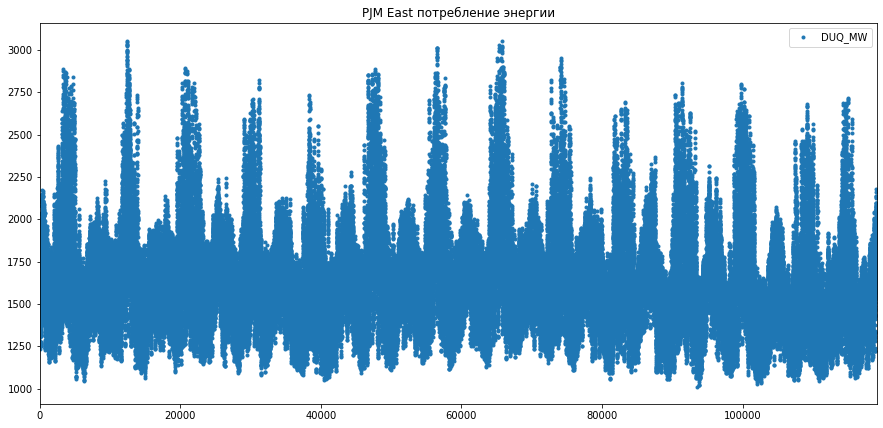

In [4]:
_ = duq.plot( style='.', figsize=( 15, 7 ), title='PJM East потребление энергии' )

Видимых аномалий нет

5. Подсчитаем количество элементов в датафрейме

In [5]:
duq.count()

Datetime    119068
DUQ_MW      119068
dtype: int64

6. Определим начало и конец временного ряда

In [6]:
duq.head(1)

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0


In [7]:
duq.tail(1)

,Datetime,DUQ_MW
119067,2018-01-02 00:00:00,1721.0


Начало периода - 2005-12-31 01:00:00<br>
Конец периода - 2018-01-02 00:00:00<br>
7. Подсчитаем требуемое количество элементов за данный период

In [8]:
test_dateset = pd.date_range('31/12/2005', '01/02/2018', freq="H")
test_dateset

DatetimeIndex(['2005-12-31 00:00:00', '2005-12-31 01:00:00',
               '2005-12-31 02:00:00', '2005-12-31 03:00:00',
               '2005-12-31 04:00:00', '2005-12-31 05:00:00',
               '2005-12-31 06:00:00', '2005-12-31 07:00:00',
               '2005-12-31 08:00:00', '2005-12-31 09:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', length=105241, freq='H')

В датафрейме оказалось больше данных, чем должно быть

### Задача 3

Экспортируем эксель-файл

In [9]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx')

Определим временнЫе границы файла

In [10]:
brent.tail()

,Дата,Значение
2662,2010-09-05,76.63
2663,2010-09-04,76.62
2664,2010-09-03,76.57
2665,2010-09-02,76.89
2666,2010-09-01,76.37


Отсортируем по дате наш ДатаФрейм

In [55]:
brent_sorted = brent.sort_values(by=['Дата'])

Для дальнейшей работы необходимо установить столбец "Дата" как индекс. Сделаем это

In [56]:
brent_notmodifed = brent_sorted.set_index('Дата')
brent_notmodifed

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
2010-09-06,76.87
2010-09-07,77.26
2010-09-08,77.93
2010-09-09,77.21


Сделаем ресемлинг в недельный ряд

In [57]:
brent_weeks = brent_notmodifed.resample("W").mean()
brent_weeks

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
2010-10-10,84.146667
2010-10-17,83.498333
2010-10-24,82.795000
2010-10-31,83.361667


Сделаем ресемплинг в месячный ряд

In [58]:
brent_months = brent_notmodifed.resample("M").mean()
brent_months

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
2011-02-28,104.451250
2011-03-31,114.811538
2011-04-30,123.197826
2011-05-31,114.345385


Сделаем ресемплинг в годовой ряд

In [59]:
brent_years = brent_notmodifed.resample("Y").mean()
brent_years

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493
2015-12-31,53.969743
2016-12-31,45.350502
2017-12-31,54.720814
2018-12-31,71.651419


Изобразим на графике полученные ряды

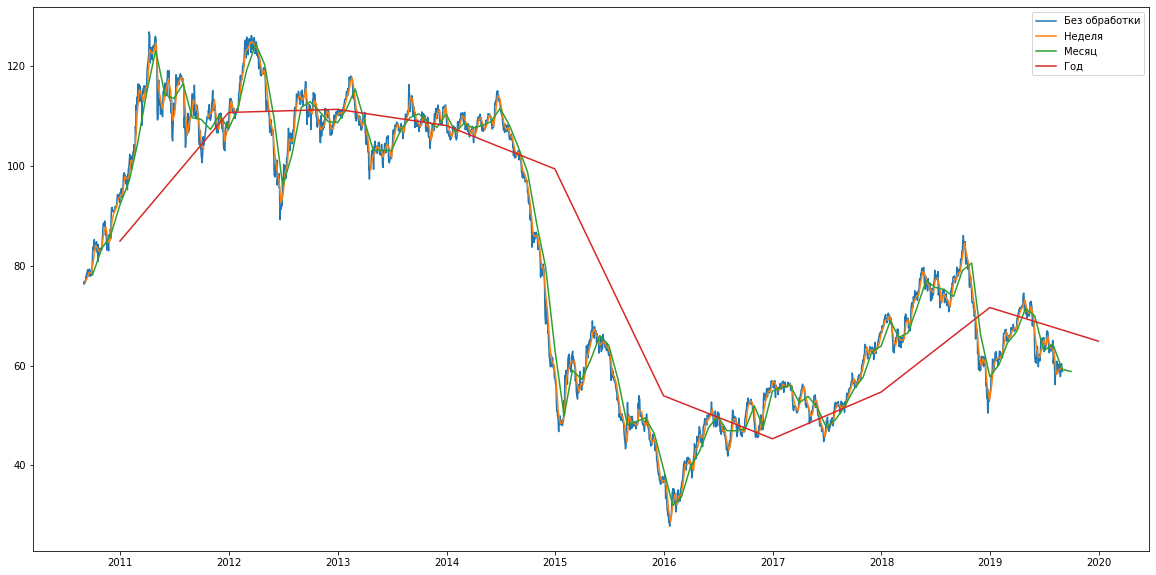

In [60]:
plt.figure(figsize=(20,10))
plt.plot(brent_notmodifed.index,brent_notmodifed['Значение'])
plt.plot(brent_weeks.index,brent_weeks['Значение'])
plt.plot(brent_months.index,brent_months['Значение'])
plt.plot(brent_years.index,brent_years['Значение'])
plt.legend(['Без обработки','Неделя', 'Месяц', 'Год'])
plt.show()

Выберем некоторый отрезок из полученного графика

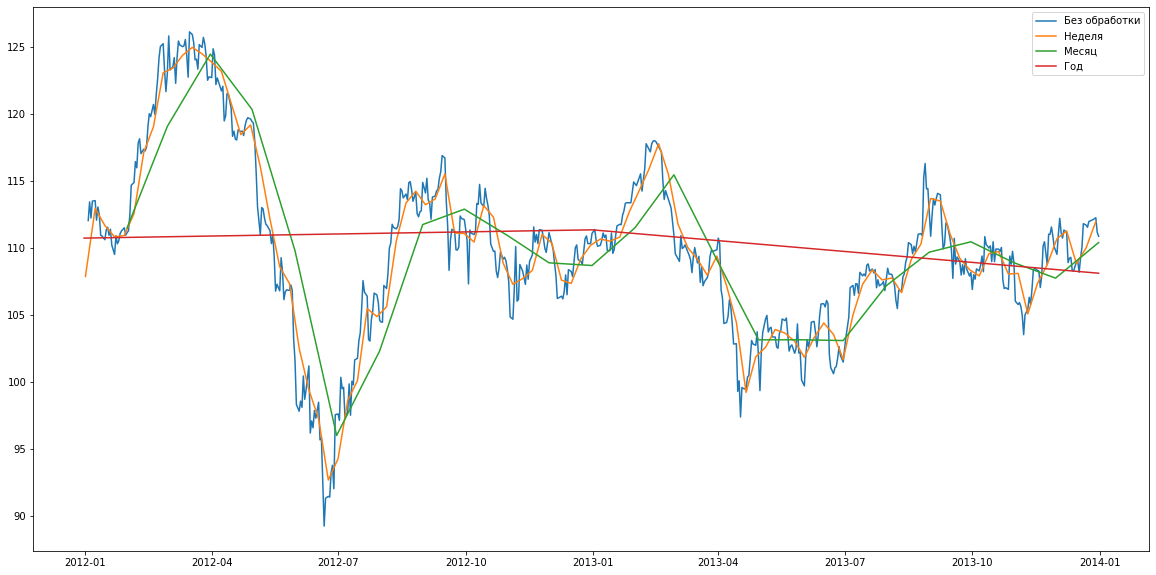

In [100]:
plt.figure(figsize=(20,10))
plt.plot(brent_notmodifed['Значение']['2012-01-01':'2014-01-01'])
plt.plot(brent_weeks['Значение']['2012-01-01':'2014-01-01'])
plt.plot(brent_months['Значение']['2012-01-01':'2014-01-01'])
plt.plot(brent_years['Значение']['2011-01-01':'2014-01-01'])
plt.legend(['Без обработки','Неделя', 'Месяц', 'Год'])
plt.show()

<b>Вывод</b>: усредненные графики не отображают динамику колебания значений